In [449]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [450]:
df = pd.read_csv('data_youtube.csv', header = 0)

In [451]:
df

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_viewCount_mv_official
0,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,QKgGAvlnjMk,WINNER - ‘I LOVE U’ M/V TEASER,2022-06-29 15:00:14+00:00,#WINNER #위너 #4thMINIALBUM #HOLIDAY #TITLE #ILO...,https://i.ytimg.com/vi/QKgGAvlnjMk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,367008.0,50094.0,2851.0,PT33S,waMAVn2hHBM,WINNER - ‘I LOVE U’ M/V,2022-07-05 09:00:12+00:00,20158481.0
1,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,Z4Byo3MYksk,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU’ M/V...,2022-03-10 15:00:30+00:00,#강승윤 #KANGSEUNGYOON #4thDIGITALSINGLE #TITLE #...,https://i.ytimg.com/vi/Z4Byo3MYksk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,308592.0,59199.0,1962.0,PT48S,9mrlCwoOQtQ,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU' M/V,2022-03-14 09:00:31+00:00,11885010.0
2,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,o_gRFsCEor8,MINO - '탕!♡ (TANG!♡)' M/V TEASER,2021-12-02 15:00:25+00:00,#MINO #송민호 #WINNER #위너 #3rdFULLALBUM #TO_INFIN...,https://i.ytimg.com/vi/o_gRFsCEor8/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,475442.0,40451.0,1477.0,PT22S,VAEEblk-qDU,MINO - '탕!♡ (TANG!♡)' M/V,2021-12-07 09:00:13+00:00,15458226.0
3,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,jMHFF6EaOr0,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V TEASER #2,2021-03-27 15:00:26+00:00,#강승윤 #KANGSEUNGYOON #1stFULLALBUM #PAGE #TITLE...,https://i.ytimg.com/vi/jMHFF6EaOr0/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,127772.0,23669.0,1708.0,PT46S,-HVfBljdSWE,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V,2021-03-29 09:00:00+00:00,12807773.0
4,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,7nlDbatnlxo,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V TEASER,2021-03-25 15:00:03+00:00,#강승윤 #KANGSEUNGYOON #1stFULLALBUM #PAGE #TITLE...,https://i.ytimg.com/vi/7nlDbatnlxo/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,194451.0,37257.0,2732.0,PT28S,-HVfBljdSWE,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V,2021-03-29 09:00:00+00:00,12807773.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),6500000,60HQ7Ehrw3s,TREASURE - 'HELLO' M/V TEASER,2022-10-01 00:00:02+00:00,#TREASURE #트레저 #2ndMINIALBUM #THESECONDSTEP_CH...,https://i.ytimg.com/vi/60HQ7Ehrw3s/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '트레...",24,1642414.0,273018.0,20452.0,PT30S,aPd9exmH17o,TREASURE - ‘HELLO’ M/V,2022-10-04 09:17:22+00:00,48268400.0
555,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),6500000,G3IfWppzoGM,TREASURE - '직진 (JIKJIN)' M/V TEASER,2022-02-11 15:00:07+00:00,#TREASURE #트레저 #1stMINIALBUM #THESECONDSTEP_CH...,https://i.ytimg.com/vi/G3IfWppzoGM/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '트레...",24,4226422.0,450291.0,108394.0,PT27S,ZJaKdBBzUYk,TREASURE - '직진 (JIKJIN)' M/V,2022-02-15 09:00:14+00:00,106134575.0
556,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),6500000,nPAfTb_ipzU,TREASURE - ‘MY TREASURE’ M/V TEASER,2021-01-08 15:00:13+00:00,#TREASURE #트레저 #1stALBUM #THEFIRSTSTEP_TREASUR...,https://i.ytimg.com/vi/nPAfTb_ipzU/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '트레...",24,2137520.0,361065.0,39545.0,PT36S,p9LLoijPQfg,TREASURE - ‘MY TREASURE’ M/V,2021-01-11 09:00:11+00:00,46139550.0
557,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),6500000,OWcEcuR7wC0,TREASURE - '사랑해 (I LOVE YOU)' M/V TEASER,2020-09-15 15:00:07+00:00,#TREASURE #트레저 #2ndSINGLEALBUM #THEFIRSTSTEP_C...,https://i.ytimg.com/vi/OWcEcuR7wC0/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '트레...",24,2751395.0,389645.0,28018.0,PT28S,_hFarg-Obuc,TREASURE - ‘사랑해 (I LOVE YOU)’ M/V,2020-09-18 09:00:16+00:00,102307125.0


In [452]:
df.describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_viewCount_mv_official
count,5.590000e+02,559.000000,5.590000e+02,5.590000e+02,559.000000,5.590000e+02
mean,2.994907e+07,10.254025,1.525434e+06,1.364211e+05,8725.767442,4.868426e+07
std,1.052498e+07,1.800004,4.389921e+06,3.406085e+05,24552.215710,1.530490e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,23.000000,5.403500e+04
25%,3.100000e+07,10.000000,2.219940e+05,1.914850e+04,988.500000,2.075826e+06
50%,3.100000e+07,10.000000,4.848090e+05,4.379500e+04,2550.000000,1.130936e+07
75%,3.100000e+07,10.000000,1.193108e+06,1.069070e+05,6967.500000,3.933700e+07
max,8.260000e+07,24.000000,6.081834e+07,2.992563e+06,250498.000000,1.972187e+09


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_channelId                559 non-null    object 
 1   video_channelTitle             559 non-null    object 
 2   video_channelSubscriber        559 non-null    int64  
 3   video_id                       559 non-null    object 
 4   video_title                    559 non-null    object 
 5   video_publishedAt              559 non-null    object 
 6   video_description              558 non-null    object 
 7   video_thumbnails               559 non-null    object 
 8   video_tags                     504 non-null    object 
 9   video_categoryId               559 non-null    int64  
 10  video_viewCount                559 non-null    float64
 11  video_likeCount                559 non-null    float64
 12  video_commentCount             559 non-null    flo

In [454]:
cats = list(df.select_dtypes('O').columns)
nums = list(df.select_dtypes(['float', 'int']).columns)
nums

['video_channelSubscriber',
 'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_viewCount_mv_official']

In [455]:
df[nums].describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_viewCount_mv_official
count,5.590000e+02,559.000000,5.590000e+02,5.590000e+02,559.000000,5.590000e+02
mean,2.994907e+07,10.254025,1.525434e+06,1.364211e+05,8725.767442,4.868426e+07
std,1.052498e+07,1.800004,4.389921e+06,3.406085e+05,24552.215710,1.530490e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,23.000000,5.403500e+04
25%,3.100000e+07,10.000000,2.219940e+05,1.914850e+04,988.500000,2.075826e+06
50%,3.100000e+07,10.000000,4.848090e+05,4.379500e+04,2550.000000,1.130936e+07
75%,3.100000e+07,10.000000,1.193108e+06,1.069070e+05,6967.500000,3.933700e+07
max,8.260000e+07,24.000000,6.081834e+07,2.992563e+06,250498.000000,1.972187e+09


In [456]:
df[cats].describe()

,video_channelId,video_channelTitle,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_duration,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official
count,559,559,559,559,559,558,559,504,559,559,559,559
unique,7,7,559,559,557,552,559,466,52,462,462,460
top,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,QKgGAvlnjMk,WINNER - ‘I LOVE U’ M/V TEASER,2016-08-08 03:00:01+00:00,The music video of TAEYEON's '#GirlsSpkOut (Fe...,https://i.ytimg.com/vi/QKgGAvlnjMk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",PT24S,BtJMOVKjhUo,SUPER JUNIOR 슈퍼주니어 'House Party' MV,2018-11-06 09:33:40+00:00
freq,498,498,1,1,2,2,1,4,38,3,3,3


<AxesSubplot:>

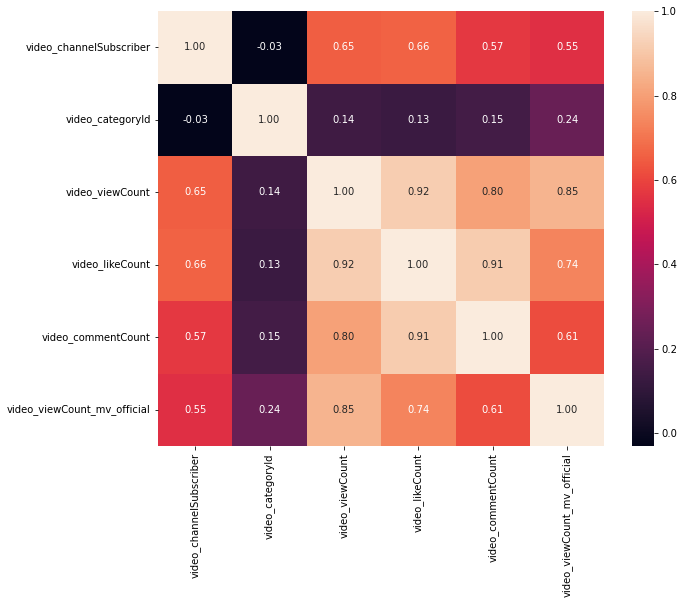

In [457]:
corr_= df[nums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f")

In [458]:
df_pre = df.copy()

In [459]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_channelId                559 non-null    object 
 1   video_channelTitle             559 non-null    object 
 2   video_channelSubscriber        559 non-null    int64  
 3   video_id                       559 non-null    object 
 4   video_title                    559 non-null    object 
 5   video_publishedAt              559 non-null    object 
 6   video_description              558 non-null    object 
 7   video_thumbnails               559 non-null    object 
 8   video_tags                     504 non-null    object 
 9   video_categoryId               559 non-null    int64  
 10  video_viewCount                559 non-null    float64
 11  video_likeCount                559 non-null    float64
 12  video_commentCount             559 non-null    flo

In [460]:
def convert_tags_to_list(string_tag):
    list_tag= re.sub('\\[|\\]','',string_tag).split(',')
    return list_tag
    

In [461]:
no_tags = []
list_tags_teaser = list(df_pre['video_tags'])
# isinstance('abc', str)
for list_tag in list_tags_teaser:
    # print(type(list_tag))
    if isinstance(list_tag,str):
        no_tags.append(len(convert_tags_to_list(list_tag)))
    else:
        no_tags.append(np.nan)
   


In [462]:
title_len = []

titles_teaser = list(df_pre['video_title'])
for title_teaser  in  titles_teaser:
    title_len.append(len(title_teaser))


In [463]:
description_len = []
descriptions_teaser = list(df_pre['video_description'])

for description_teaser in descriptions_teaser:
    if isinstance(description_teaser,str):
        description_len.append(len(description_teaser))
    else:
        description_len.append(np.nan)
len(description_len)


559

In [464]:
df_pre['video_num_tag'] = no_tags
df_pre['video_title_len'] = title_len
df_pre['video_description_len'] = description_len

In [465]:
df_pre.isnull().sum()

video_channelId                   0
video_channelTitle                0
video_channelSubscriber           0
video_id                          0
video_title                       0
video_publishedAt                 0
video_description                 1
video_thumbnails                  0
video_tags                       55
video_categoryId                  0
video_viewCount                   0
video_likeCount                   0
video_commentCount                0
video_duration                    0
video_id_mv_official              0
video_title_mv_official           0
video_publishedAt_mv_official     0
video_viewCount_mv_official       0
video_num_tag                    55
video_title_len                   0
video_description_len             1
dtype: int64

In [466]:
num_pre = list(df_pre.select_dtypes(['float','int']).columns)
num_pre = ['video_channelSubscriber',
 'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_num_tag',
 'video_title_len',
 'video_description_len',
 'video_viewCount_mv_official',]

<AxesSubplot:>

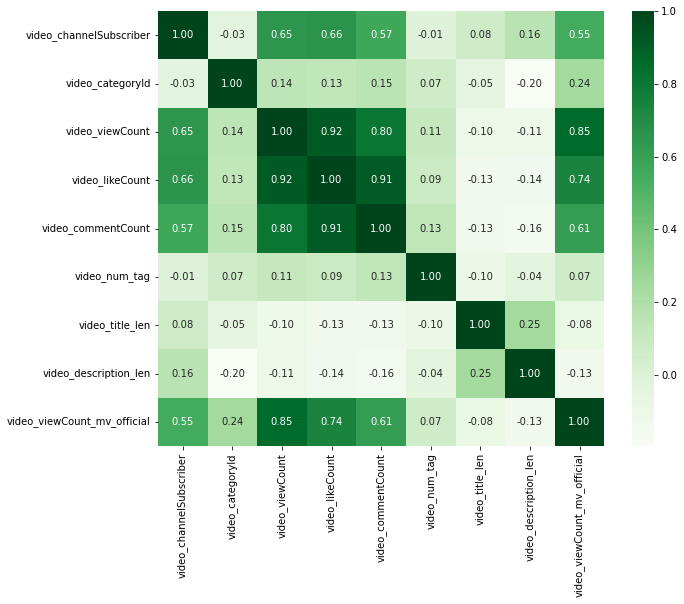

In [467]:
corr_= df_pre[num_pre].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="Greens")

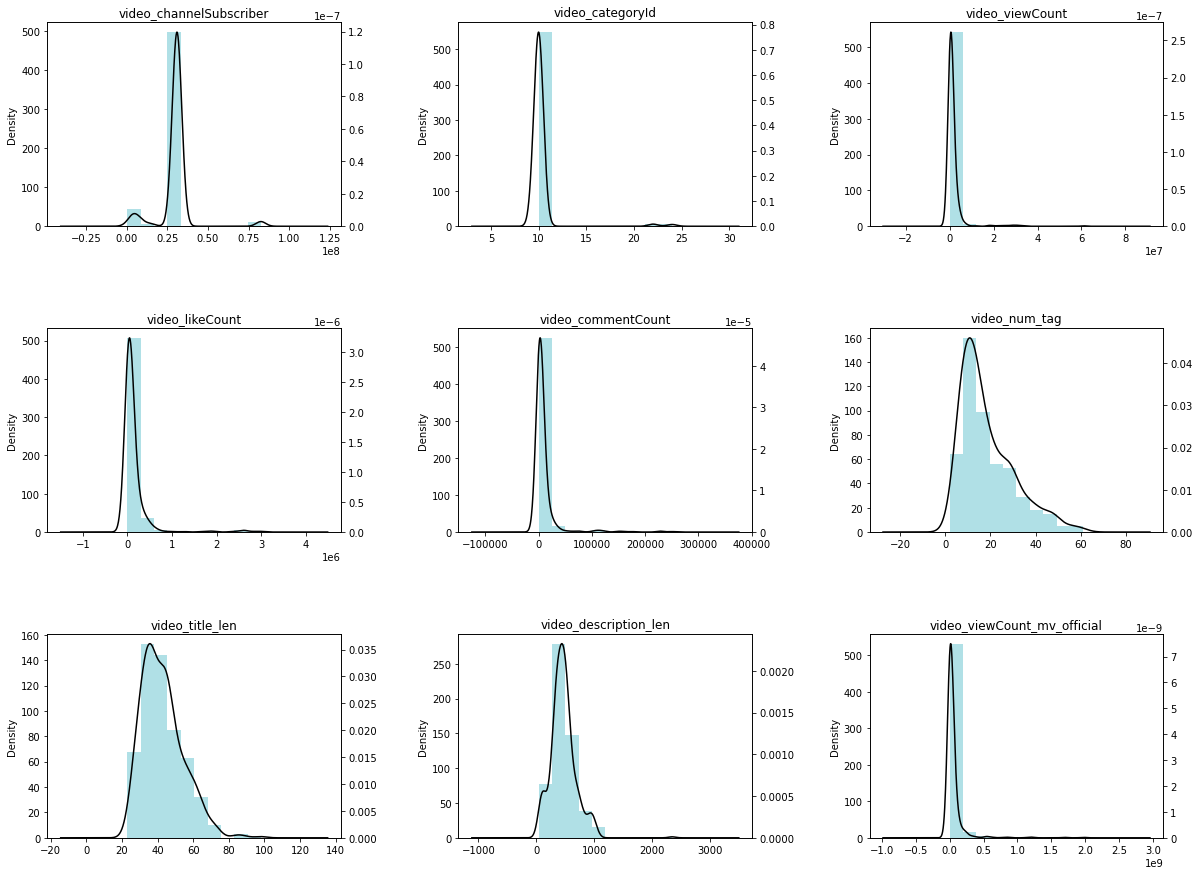

In [468]:
data_num = df_pre[num_pre]
plt.figure(figsize= (20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i, (name, col) in enumerate(data_num.iteritems()):
    plt.subplot(3, 3, i+1)
    col.hist( color='powderblue')
    ax2 = col.plot.kde( secondary_y=True, title=name, color='black')
    ax2.set_ylim(0)



Xử lý missing vallue

In [469]:
df_num = df_pre[num_pre].copy()

In [470]:
df_num.isna().sum()

video_channelSubscriber         0
video_categoryId                0
video_viewCount                 0
video_likeCount                 0
video_commentCount              0
video_num_tag                  55
video_title_len                 0
video_description_len           1
video_viewCount_mv_official     0
dtype: int64

In [471]:
df_num['video_num_tag'].fillna(df_num['video_num_tag'].mean(),  inplace=True)
df_num['video_description_len'].fillna(df_num['video_description_len'].mean(),  inplace=True)

In [472]:
df_num

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_viewCount_mv_official
0,4000000,10,367008.0,50094.0,2851.0,16.0,30,87.0,20158481.0
1,4000000,10,308592.0,59199.0,1962.0,20.0,53,109.0,11885010.0
2,4000000,10,475442.0,40451.0,1477.0,31.0,32,103.0,15458226.0
3,4000000,10,127772.0,23669.0,1708.0,20.0,49,99.0,12807773.0
4,4000000,10,194451.0,37257.0,2732.0,25.0,46,98.0,12807773.0
...,...,...,...,...,...,...,...,...,...
554,6500000,24,1642414.0,273018.0,20452.0,38.0,29,123.0,48268400.0
555,6500000,24,4226422.0,450291.0,108394.0,38.0,35,95.0,106134575.0
556,6500000,24,2137520.0,361065.0,39545.0,46.0,35,94.0,46139550.0
557,6500000,24,2751395.0,389645.0,28018.0,43.0,40,99.0,102307125.0


Scale

predict

In [473]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [474]:
# df_test = df_num.copy()
# scl = MinMaxScaler()
# aa1 = scl.fit_transform(df_test)
# # MinMaxScaler().inverse_transform(aa1)
# #scl.inverse_transform(aa1)

In [475]:
# df_aa = pd.DataFrame(aa1, columns =['video_channelSubscriber',
#  'video_categoryId',
#  'video_viewCount',
#  'video_likeCount',
#  'video_commentCount',
#  'video_num_tag',
#  'video_title_len',
#  'video_description_len',
#  'video_viewCount_mv_official',])

In [476]:
df_train, df_test = train_test_split(df_num, test_size=0.2, random_state= 42)
X_train = df_train.copy()
y_train = X_train.pop("video_viewCount_mv_official")

X_test = df_test.copy()
y_test = X_test.pop("video_viewCount_mv_official")

In [477]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [478]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [479]:
def eval_regression_train(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytrain, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytrain, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytrain, pred))

In [480]:
# # LINEAR REGRESSION

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

eval_regression_train(model, y_pred_train, X_train, y_train, X_test, y_test)
eval_regression(model, y_pred_test, X_train, y_train, X_test, y_test)

MAE: 34079357.47
MSE: 77885719.68
R2 score: 0.77
MAE: 32804822.42
MSE: 60432686.71
R2 score: 0.69


In [481]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 3.0)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
eval_regression(reg_ridge, y_pred, X_train, y_train, X_test, y_test)

MAE: 32798218.96
MSE: 60421747.57
R2 score: 0.69


In [482]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 3)
reg_lasso.fit(X_train, y_train)

y_pred = reg_lasso.predict(X_test)
eval_regression(reg_lasso, y_pred, X_train, y_train, X_test, y_test)

MAE: 32804822.11
MSE: 60432686.32
R2 score: 0.69


In [483]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

regr = ElasticNet(alpha = 1.0, l1_ratio=0.5, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
eval_regression(regr, y_pred, X_train, y_train, X_test, y_test)

MAE: 32394925.26
MSE: 59828757.30
R2 score: 0.70


In [484]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_regression(rf, y_pred, X_train, y_train, X_test, y_test)

y_pred_train = model.predict(X_train)
eval_regression_train(model, y_pred_train, X_train, y_train, X_test, y_test)

MAE: 26938106.10
MSE: 52892886.79
R2 score: 0.77
MAE: 34079357.47
MSE: 77885719.68
R2 score: 0.77
